# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [22]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
#calculate distance between rows
rowdict = {}
for col in data.columns:
    rowdict[col] = (max(data[col]), min(data[col]))

#naive method to calculate the distance between rows, each feature has different range, so
#all features are normalized by its range
def distance(row1, row2, row3):
    d = 0
    for col in row1.index:
        factor = rowdict[col] #normalizing factor for a given feature
        dcol = abs(row1[col] - row2[col])
        dcol += abs(row2[col] - row3[col])
        dcol += abs(row3[col] - row1[col])
        d += dcol*1.0/(factor[0] - factor[1])
    return d

import random
random.seed(0)
from random import choice
def getSample():
    while True:
        i = choice(data.index)
        j = choice(data.index)
        k = choice(data.index)
        if i != j and j != k and i != k:
            yield (i, j, k)
            
count = 0
maxd = -1
maxrow = None
for (row1, row2, row3) in getSample():
    d = distance(data.loc[row1], data.loc[row2], data.loc[row3])
    if d > maxd:
        maxd = d
        maxrow = (row1, row2, row3)
    count += 1
    if count > 2500 and maxrow is not None:
        break
        
print 'maximum distance:', maxd
print 'maximum row index: ', maxrow

maximum distance: 6.31855771079
maximum row index:  (284, 85, 376)


In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [85, 284, 376]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117,46197,92780,1026,40827,2944
1,68951,4411,12609,8692,751,2406
2,3136,8630,13586,5641,4666,1426


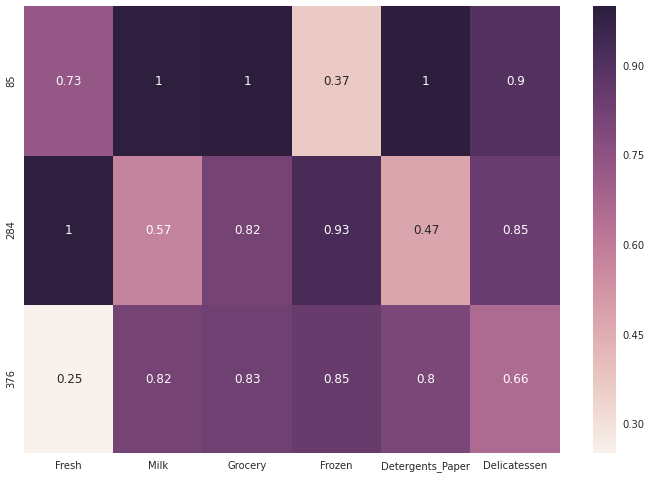

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#plot the percentile of sample points for each feature in a heatmap for visual analysis
plt.figure(figsize=(12,8))
sns.heatmap(data.rank(pct=True).iloc[indices],annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

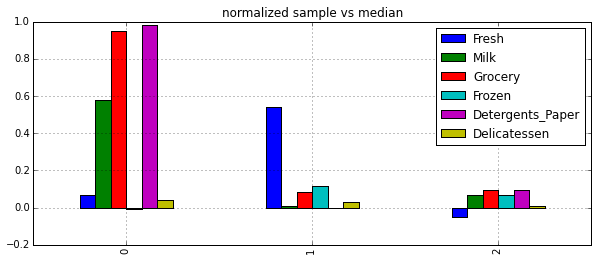

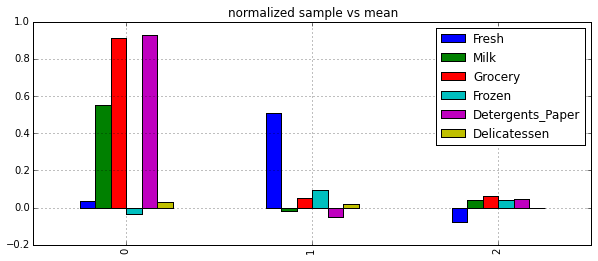

In [5]:
#compare each sample against the mean/median for each product category. the data is normalized to make comparison easier
((samples - data.median())/(data.max() - data.min())).plot.bar(figsize=(10, 4), title="normalized sample vs median", grid=True)
((samples - data.mean())/(data.max() - data.min())).plot.bar(figsize=(10, 4), title='normalized sample vs mean', grid=True)

**Answer:**
a plot of the sample data vs the mean and median (in case the data is skew) is as shown above.So, we can understand the behaviour of each customer for each product relative to the mean/median.

customer 85  (corresponding to 0 in the diagram above)
the purchase for milk, grocery and detergents paper are way above average/median, but the demand for fresh, frozen and delicateseen is about the mean. This could be a retailer

customer 284 (corresponding to 1 in the diagram above)
the purchase for fresh product is much higher. The customer is most probably a restaurant, which requires fresh food.

customer 376 (corresponding to 2 in the diagram above)
all categories for this customer is close to the mean/median, only the demand for fresh product is slightly below the mean. this customer may be a cafe which doesn't sell fresh product.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
#for each features in the data set, find the prediction score
for selected_feature in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(selected_feature, axis=1, inplace=False)

    # TODO: Split the data into training and testing sets using the given feature as the target
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[selected_feature], test_size=0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    
    #report score for this feature
    print 'Score for {}: {:.4}'.format(selected_feature, score)
    print 'Feature importances: ', zip(new_data.columns, regressor.feature_importances_)
    print '\n'

Score for Fresh: -0.2525
Feature importances:  [('Milk', 0.17933073357941559), ('Grocery', 0.14508791388110318), ('Frozen', 0.45990587237272312), ('Detergents_Paper', 0.090729224074464015), ('Delicatessen', 0.12494625609229409)]


Score for Milk: 0.3657
Feature importances:  [('Fresh', 0.14678611932194763), ('Grocery', 0.22779840166557785), ('Frozen', 0.011796603267152853), ('Detergents_Paper', 0.48140503222052405), ('Delicatessen', 0.13221384352479759)]


Score for Grocery: 0.6028
Feature importances:  [('Fresh', 0.028130469062011415), ('Milk', 0.064525286318322786), ('Frozen', 0.024749564384700735), ('Detergents_Paper', 0.8698771771245366), ('Delicatessen', 0.012717503110428378)]


Score for Frozen: 0.254
Feature importances:  [('Fresh', 0.20588895254255626), ('Milk', 0.11687498560613246), ('Grocery', 0.067077916628263581), ('Detergents_Paper', 0.16243073114564546), ('Delicatessen', 0.44772741407740219)]


Score for Detergents_Paper: 0.7287
Feature importances:  [('Fresh', 0.03067552

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

the result of using other features to predict a given feature is listed below

| Feature | R<sup>2</sup> Score | comment |
| ------- | ------------------- | ------- |
| Fresh | -0.2525 | can't be predicted from other features |
| Milk | 0.3657 | can't be predicted from other features |
| Grocery | 0.6028 | marginal |
| Frozen | 0.254 | can't be predicted reliably from other features |
| Detergent Paper | 0.7287 | highest score, good candidate as the redundant feature to be removed |
| Delicatessen | -11.66 | can't be predicted from other features |


The highest score among all features is detergent paper, it has a score of 0.7287. other features has -ve or low R<sup>2</sup> score. which means the model we can potentially remove the detergent paper feature, and the model is still able to identify the customer's spending habit using the remaining feature.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


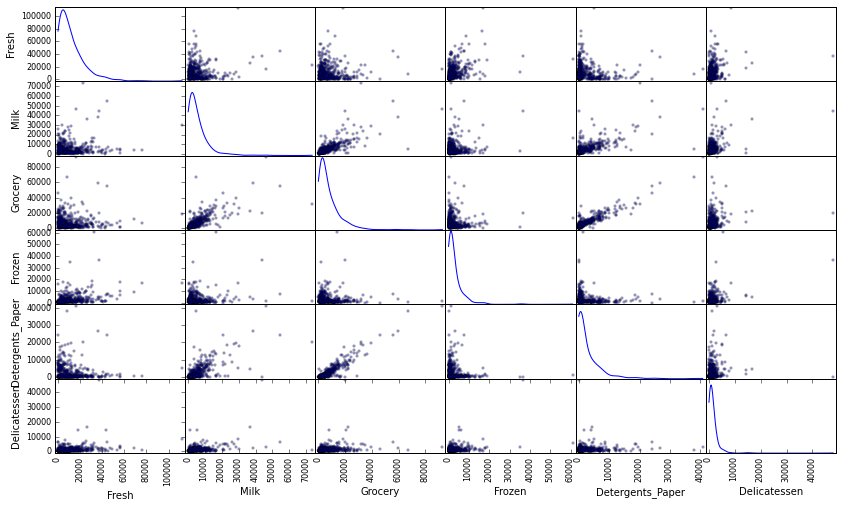

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

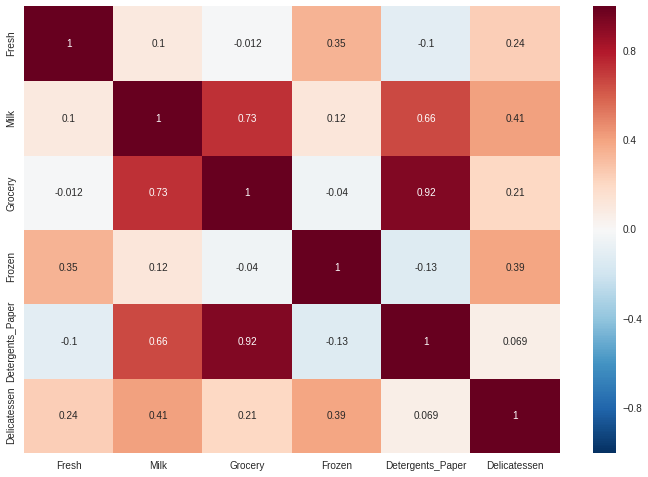

In [22]:
#alternative we can show the correlation relationship in a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

from the scatter matrix above, examining the kde density plot along the diagonal, it is obvious the data are positively skew. It is definitely not resembling normal distribution, it resemble more a log-normal distribution.

and it seems there is an approximate linear correlation between grocery and detergent paper. Also milk is somewhat correlated with grocery and detergent paper as well. [and this can also be seem from the important features attribute from the Decision Tree regressor above]
this confirms detergent paper can be predicted well by other features like milk, grocery.



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

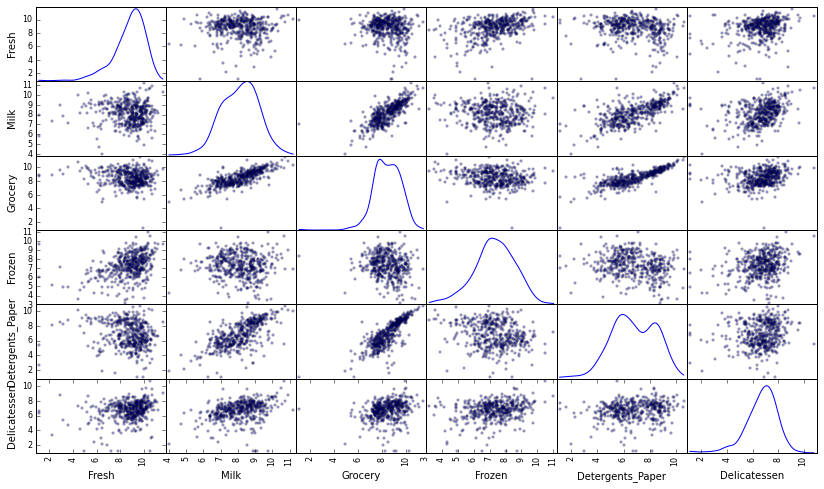

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

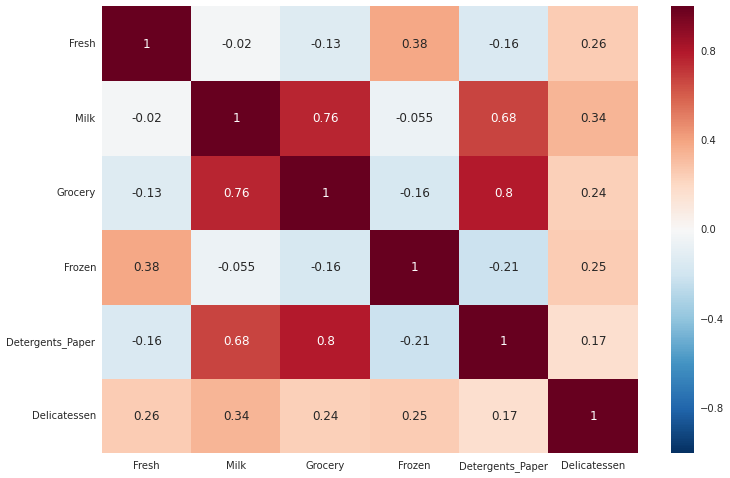

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(log_data.corr(), annot=True)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

after applying the feature scaling to the data, the features appear more normal. The correlation seems to remain there.
below show the impact of feature scaling to the R<sup>2</sup>. 

the correlation between grocery and detergent paper, grocery and milk, detergent paper and milk remains there, but looking at the R<sup>2</sup>, the coefficient of determination drops significantly. And does not seem predicting detergent paper from rest of feature is not doing very well


In [10]:
for selected_feature in log_data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = log_data.drop(selected_feature, axis=1, inplace=False)

    # TODO: Split the data into training and testing sets using the given feature as the target
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, log_data[selected_feature], test_size=0.25, random_state=0)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    
    #report score for this feature
    print 'Score for {}: {:.4}'.format(selected_feature, score)


Score for Fresh: -0.3405
Score for Milk: 0.3759
Score for Grocery: 0.4499
Score for Frozen: -0.4893
Score for Detergents_Paper: 0.3054
Score for Delicatessen: -1.596


In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
1,11.141151,8.391857,9.442166,9.070158,6.621406,7.785721
2,8.050703,9.063000,9.516795,8.637817,8.448057,7.262629


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
potential_outliers = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    potential_outliers.extend(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index.tolist())

outliers = [ 65, 66, 75, 128, 154]
print 'list of indexes for the outliers', outliers
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

from collections import Counter
print 'duplicate count'
print Counter(potential_outliers)

print 'number of outliers:', len(potential_outliers), ', % of the data {:.4}%'.format(len(potential_outliers)*100./len(data))

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


list of indexes for the outliers [65, 66, 75, 128, 154]
duplicate count
Counter({154: 3, 128: 2, 65: 2, 66: 2, 75: 2, 193: 1, 264: 1, 137: 1, 142: 1, 145: 1, 412: 1, 285: 1, 161: 1, 420: 1, 38: 1, 171: 1, 429: 1, 175: 1, 304: 1, 305: 1, 439: 1, 184: 1, 57: 1, 187: 1, 203: 1, 325: 1, 289: 1, 81: 1, 338: 1, 86: 1, 343: 1, 218: 1, 95: 1, 96: 1, 353: 1, 98: 1, 355: 1, 356: 1, 357: 1, 233: 1, 109: 1, 183: 1})
number of outliers: 48 , % of the data 10.91%


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
from the outlier list above, there are duplicates, i.e. same data point has 1 or more features that are outlier.
e.g. 65, 66, 75, 128, 154 

outliers can cause problem with the learning algorithm . algorithm usually is sensitive to the range and distribution of the feature value. outliers can skew and mislead the training algorithm resulting in poor result.

However, we are not sure each one of the data in the outlier list is really an outlier, or it is legitimate. To increase the confidence we only remove real outliers. I only remove those rows in the outlier list, which has more than 2 count in the outlier list.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

###### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[[ 0.16746374 -0.40143866 -0.43811142  0.17820975 -0.75142613 -0.14987105]
 [-0.68593522 -0.16722783 -0.07072902 -0.50054207 -0.04244398 -0.49414702]
 [-0.67738927  0.04020501 -0.01953317  0.31504299 -0.21170161  0.62855082]
 [-0.204293    0.01281068  0.05567564  0.78544905  0.20961368 -0.54233972]
 [-0.00261356  0.71923846  0.3553861  -0.0330861  -0.55815441 -0.20918629]
 [ 0.02915623 -0.54018269  0.82053348  0.02054106 -0.18238824  0.01974794]]
explained variance ratio
[ 0.44302505  0.26379218  0.1230638   0.10120908  0.04850196  0.02040793]


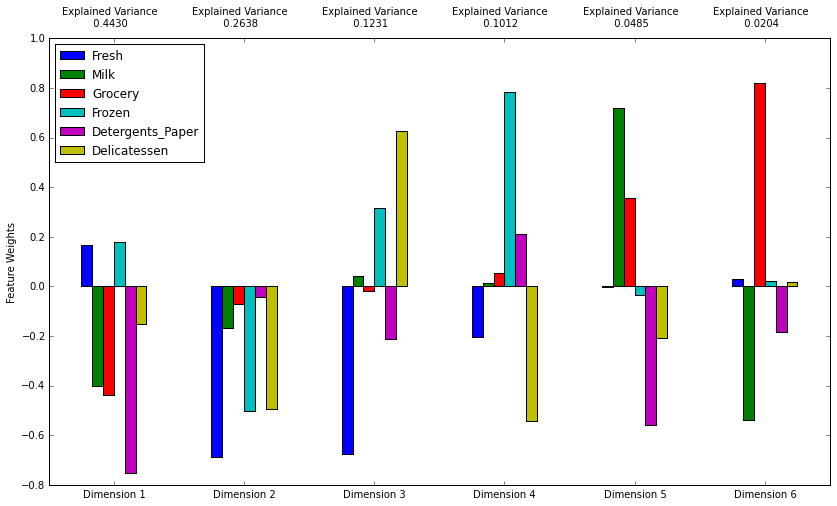

In [13]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = len(good_data.columns))
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print pca.components_
print 'explained variance ratio'
print pca.explained_variance_ratio_

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.44302505,  0.70681723,  0.82988103,  0.93109011,  0.97959207,  1.        ])

**Answer:**
roughly 70% of the variance in the data is explained by first and second principal components, And about 93% is explained by the first four principal component.

1. The first principal component, captures most of the variation from grocery, detergent paper and milk, as notice before, grocery, detergent paper and milk has high correlation. may be a retailer
2. The second principal component, in contrast captures most of the variation given by fresh, frozen, and delicatessen, they are highly correlated. may be restaurant.
3. The third principal component, captures the variation given by fresh and delicatessen, and fresh and delicatessen have opposite sign. may be a deli that sells delicatessen but not fresh food.
4. The fourth principal component, captures the variation given by frozen and delicatessen. frozen is negatively correlated with delicatesesen. If high in frozen and low on fresh and delicatessen,  May be shop that only sell frozen product, like ice cream shop.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-5.3316,-1.8845,-0.6957,-0.1972,0.5461,0.3802
1,0.1426,-3.1477,-0.3435,0.3149,0.3453,0.8224
2,-2.0483,-0.7480,0.9237,1.2860,-0.0332,0.0786


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-5.3316,-1.8845
1,0.1426,-3.1477
2,-2.0483,-0.7480


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

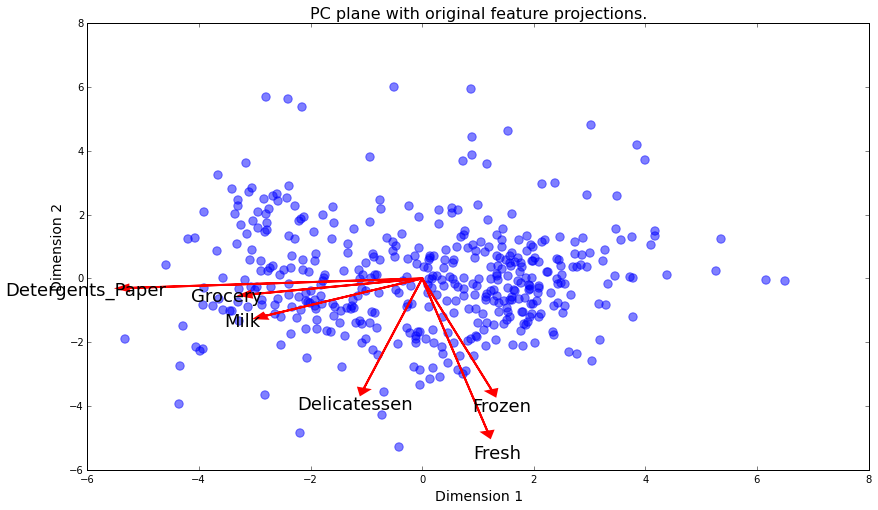

In [77]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

from biplot, it seems Detergent paper, grocery and milk is most strongly correlated with the first component.Fresh, frozen and delicatessen will be more strongly correlated with the second component.

This result is in line with our PCA result above


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**k-means**
cluster data by trying to separate samples in n groups of equal variance. User has to specify the number of cluster, and the algorithm will randomly pick some initial centroids, and then the algorithm will iteratively assign to each sample the closest centroid. Then it will create new centroids by taking average of all the samples in the same cluster. This process is repeated until the centroids do not move significantly.

The result depends on where the initial placement of the centroids, and in unfortunate condition, can yield bad result. Hence usually, the agorithm will be run multiple times with different initial placement of the centroids.

**advantages:**
- scalable
- fast to run
- easy to understand
- guarantee to converge

**Gaussian Mixture Model**
A Gassian mixture model is a probabistic model that assumes all data points are generated from a mixture of a finite number of gaussian distributions with unknown parameters. One can think of mixture models as generalizing the K-Means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussian.

It use EM algorithm to make a soft assignment of each data point to each of the cluster.

**advantages**
- perform soft clustering (incorporates degree of uncertainly as which cluster the data point belongs)
- more informative, can look at the probabilites on the clustering result
- it can handle elongated or oblong clusters.

**reference**<BR>
[A comparsion of the clustering algorithm in scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)
[scikit-learn, Gaussian mixture model](http://scikit-learn.org/stable/modules/mixture.html#mixture)

comparsion of K-Means vs Gassian mixtures, from [A comparsion of the clustering algorithm in scikit-learn](http://scikit-learn.org/stable/modules/clustering.html) is reproduced below

| Method Name | Parameters | Scalability | UseCase | Geometry (metric used) |
| ----------- | ---------- | ----------- | ------- | ---------------------- |
| K-Means | number of clusters | Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters| Distances between points |
| Gaussian mixtures | many | Not scalable | Flat geometry, good for density estimation | Mahalanobis distances to centers |

for this exercise Gaussian Mixture Model (GMM) will be used, because it allows a soft assignment of each data point to the cluster. There may be overlapping characteristic for a given customer, sometimes it is hard to assign a customer exclusively only to a single cluster. a probabilistic approach seems more appropriate


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_silhouette_score(cluster, data):
    cluster.fit(data)
    preds = cluster.predict(data)
    score = silhouette_score(data, preds, random_state = 0)
    return score, preds

best_cluster_model = None
best_cluster = None
best_score = -1
best_preds = None
best_sample_preds = None
best_center = None
for n in range(2,15):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    gcluster = GaussianMixture(n_components = n, random_state = 0)
    gscore, gpreds = calculate_silhouette_score(gcluster, reduced_data)
    
    kcluster = KMeans(n_clusters=n, random_state = 0)
    kscore, kpreds = calculate_silhouette_score(kcluster, reduced_data)

    # TODO: Find the cluster centers
    gcenters = gcluster.means_
    kcenters = kcluster.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    g_sample_preds = gcluster.predict(pca_samples)
    k_sample_preds = kcluster.predict(pca_samples)

    if gscore > best_score:
        best_cluster_model = 'GMM'
        best_cluster = gcluster
        best_score = gscore
        best_preds = gpreds
        best_sample_preds = g_sample_preds
        best_center = gcenters
    if kscore > best_score:
        best_cluster_model = 'KMean'
        best_cluster = kcluster
        best_score = kscore
        best_preds = kpreds
        best_sample_preds = k_sample_preds
        best_center = kcenters
    print 'numer of clusters:', n, 'KMean Score:', kscore, 'Gaussian mixture score:', gscore
print 'best model:',best_cluster_model, 'best score:', best_score

cluster = best_cluster
preds = best_preds
centers = best_center
sample_preds = best_sample_preds


numer of clusters: 2 KMean Score: 0.426281015469 Gaussian mixture score: 0.421916846463
numer of clusters: 3 KMean Score: 0.39689092645 Gaussian mixture score: 0.37420184754
numer of clusters: 4 KMean Score: 0.332009582682 Gaussian mixture score: 0.3290804667
numer of clusters: 5 KMean Score: 0.350990778931 Gaussian mixture score: 0.305874552873
numer of clusters: 6 KMean Score: 0.366608987343 Gaussian mixture score: 0.224815181533
numer of clusters: 7 KMean Score: 0.363315403845 Gaussian mixture score: 0.274333813489
numer of clusters: 8 KMean Score: 0.350994069935 Gaussian mixture score: 0.344370057027
numer of clusters: 9 KMean Score: 0.354141089847 Gaussian mixture score: 0.334323885363
numer of clusters: 10 KMean Score: 0.351003748094 Gaussian mixture score: 0.340631655305
numer of clusters: 11 KMean Score: 0.351930383255 Gaussian mixture score: 0.319715768618
numer of clusters: 12 KMean Score: 0.350885495285 Gaussian mixture score: 0.321553333821
numer of clusters: 13 KMean Score

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?*



**Answer:**

the result for several cluster number is as follows, it seems contrary to what i expect, KMeans performs better than Gaussian mixture. The following figure is based on KMean.

| number of cluster | silhouette score |
| ----------------- | ---------------- |
| 2 | 0.426281015469 |
| 3 | 0.39689092645 |
| 4 | 0.332009582682 |
| 5 | 0.350990778931 |
| 6 | 0.366608987343 |

best silhouette score corresponding to 2 clusters using KMean (notice for Gaussian mixture, the best silhouette score is also using 2 cluster)


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

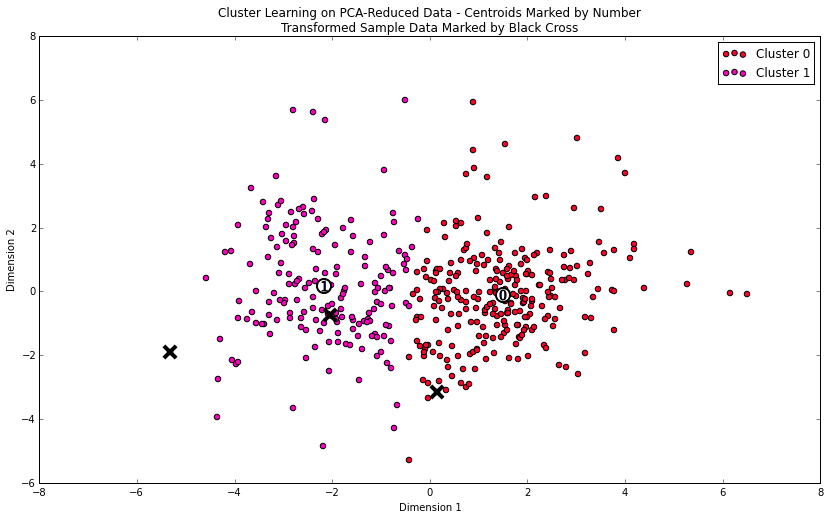

In [87]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [19]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [89]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Answer:**

**segment 0**
    - consumes more fresh and frozen, and less on milk, grocery, detergent paper and delicatessen. may be it is a restaurant
**segment 1**
    - consumes more milk, grocery and detergent paper, and less on fresh, frozen and delicatessen. may be it is a retailer

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3133.0,-3899.0,-5474.0,-984.0,-2587.0,-844.0
Segment 1,-7995.0,2104.0,4153.0,-2120.0,1680.0,-489.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,363.0,-1730.0,-2279.0,562.0,-522.0,-285.0
Segment 1,-4499.0,4273.0,7348.0,-574.0,3745.0,70.0


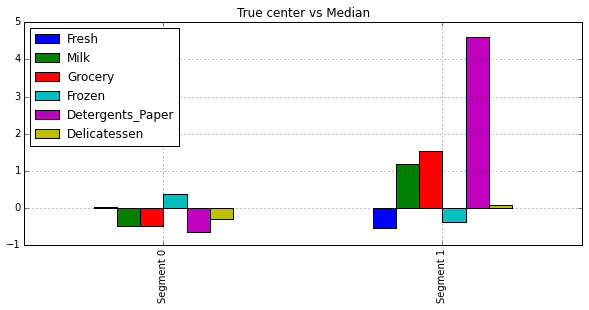

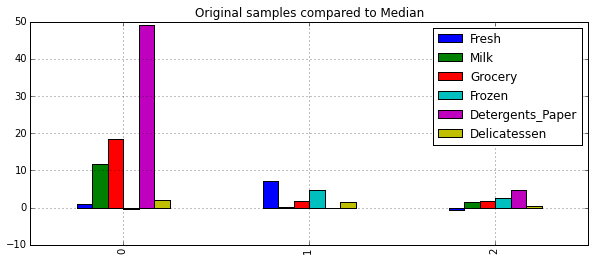

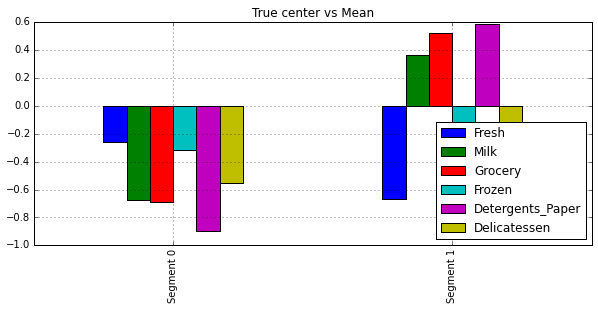

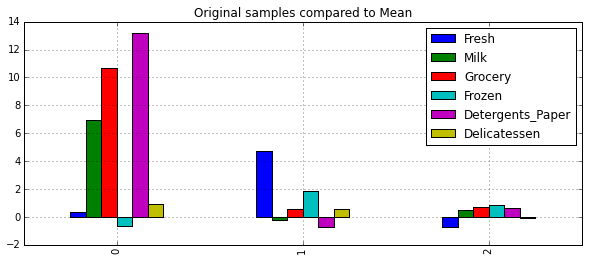

In [21]:
#comparing the data centers vs mean and median
display(true_centers - data.mean().round())
display(true_centers - data.median().round())

((true_centers - data.median())/data.median()).plot.bar(figsize=(10,4), title = 'True center vs Median', grid=True)
((samples-data.median())/data.median()).plot.bar(figsize=(10,4), title = 'Original samples compared to Median', grid=True)
((true_centers - data.mean())/data.mean()).plot.bar(figsize=(10,4), title='True center vs Mean', grid=True)
((samples-data.mean())/data.mean()).plot.bar(figsize=(10,4), title='Original samples compared to Mean', grid=True)

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [39]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**
**sample point 0**
    - it is predicted by the model to be in cluster 1, which may be a retailer
    - from the True-center/Median&Mean plot above, it is observed this sample point 0 is close to cluster 1. The demand for Detergent paper is way above Median/Mean.
    - from question 1, this sample where the demand for milk, grocery and detergent paper are way above average/median, and is classified as a retailer
    - both predicted from question 1, and by the model agrees
**sample point 1**
    - it is predicted by the model to be in cluster 0, which may be a restaurant.
    - from the True-center/Median&Mean plot above, it is observed this sample point 1 is close to cluster 0
    - from question 1, this sample  where the demand for fresh product is much higher, and is predicted to be a restaurant
    - both predicted from question 1, and by the model agrees
**sample point 2**
    - it is predicted by the model to be in cluster 1, which may be a retailer
    - from the True-center/Median&Mean plot above, it is observed this sample point 2, is close to cluster 1. the Detergent_paper is higher than the Median/Mean, while Fresh product is below Median/Mean.
    - from question 1, this sample where the demand for fresh product is less, and is predicted to be a cafe which doesn't sell fresh product.
    - both predicted from question 1, and the model kind of agree.
    
so we can conclude the prediction made by the model is consistent with what we predict in question 1

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

we will not expect the change will affect all customers equally, those who demand fresh food, will be impacted more than those having a high demand on frozen food for example

we can find out the effect of change by applying the A/B test on each segment separately.

**A/B test**
- run the following step for each customer segment
- we run the A/B on the selected segment, to determine if making the proposed change will affect its customer positively or negatively.
- if the feedback from the selected customer segment is positive, the company may consider implementing the change to that customer segment.

**to run A/B on selected customer segment**
- select a group of customers who are voluntarily to participate in this new delivery service, make sure they understand this service change is only for a limited time (2 weeks for example), and is evaluation only.
- may be by offering them some discount or other incentives, to make sure the number of customers participating in this program is of sufficient size, may be at least 1-2% of the population for this customer segment.
- then after the trial period, gather the feedback from the customers, to see if their feedback is positive or negative, from a scale of -1 (very negative) to +1 (very positive)
- also we should also gather the feedback from those customers not in this new service delivery program, and ask them to provide feedback of their existing service.
- Then we can compare the overall feedback from both group (those in the new service delivery program, and those in the existing service delivery program).
- If the feedback from the new program is more positive, then the company can consider implementing the new service for this customer segment.
    
**expectation**
- it is expected the new schedule, which reduce the number of deliveries from 5 days/week to 3 days/week, will have a negative impact for customer segment 0, which has a high demand for fresh product.

- The effect on customer segment 1,is not clear until the A/B test result is available. Since customer segment 0 has a smaller demand for fresh product, may be reducing the delivery schedule, actually helps them to bring down the cost.
with less frequent delivery schedule, they will order more for each delivery, and get better discount because of the order is bigger each time.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

- we can use preds (the customer segment which a customer belongs to) as the target variable, and then use this to train a supervised learner.
- Then those ten new customers, can be classified by this supervised learner based on the estimates annual spending provided.


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

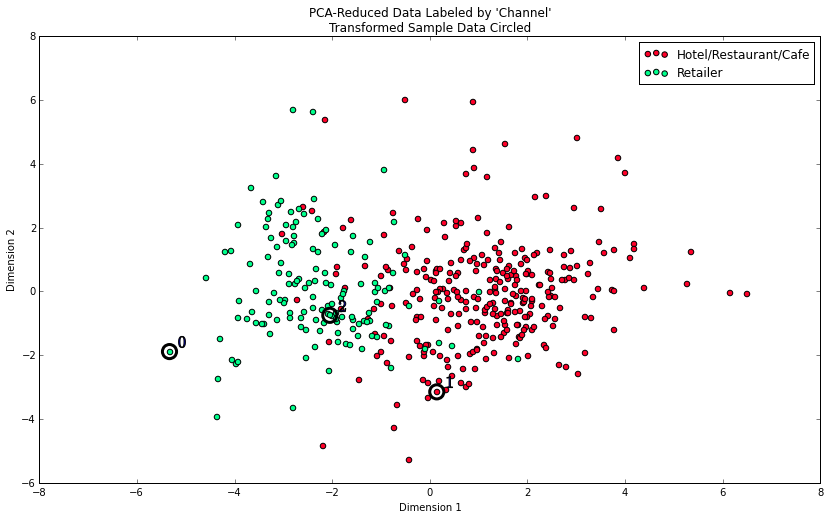

In [91]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

- The number of clusters picked by the clustering algorithm of my choice is 2, which match well with the underlying distribution.
- customer segment 0 from our model will correspond to Hotel/Restaurant/Cafe, while customer segment 1 will correspond to retailer of the underlying distribution. 
- The similarity of the clustering produced by the model and underlying distribution is high, however it is notice that there are  some contamination in the clustering diagram from the underlying distribution.
- the clustering algorithm predicts out of 3 samples, 2 belongs to retailer customer segment, and 1 belongs to restaurant segment, which agrees well with what is indicated by the underlying distribution

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.